In [ ]:
### Look Conservative electorate flows in 2024 (premature given waves 27+ aren't out so 'estimated')
# FURTHER WORK - wait for later waves to look at detailed splits, what predicts vote change, and non-voting
#              - try to create segmentation for larger view con electorate

In [3]:
%%time
dataset_name = "W25_comb"
df_list = "BES_Panel"
#|BES_reduced_with_na"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

global BES_label_list, BES_df_list
# BES_reduced_with_na.index=BES_Panel.index

Toggle code

var_type (10365, 13)
CPU times: total: 1min 57s
Wall time: 1min 57s


In [ ]:
## maybe also W26_only

In [2]:
BES_PanelW26 = pd.read_pickle("E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_data\\W26_only\\BES2019_W26_v0.0.zip",
                                       compression='zip')
BES_PanelW26.columns = [ x+"W26" for x in BES_PanelW26.columns ]

,idW26,waveW26,weightW26,turnoutUKGeneralW26,generalElectionVoteW26,partyIdStrengthW26,partyIdW26,bestOnMIIW26,polAttentionW26,likeConLeaderW26,...,p_job_sectorW26,p_maritalW26,p_disabilityW26,p_religionW26,p_sexualityW26,p_ethnicityW26,p_edlevelW26,lr_scaleW26,al_scaleW26,genderW26
id,,,,,,,,,,,,,,,,,,,,,
9,9,26,0.430024,Very likely that I would vote,Labour,NaN,No - none,Liberal Democrat,8,3,...,Private sector - profit seeking,Single,No,"No, I do not regard myself as belonging to any...",Gay or lesbian,White British,Undergraduate,NaN,NaN,Men
14,14,26,0.543611,Very likely that I would vote,Conservative,Fairly strong,Conservative,Conservative,6,9,...,99.0,Married,No,Yes - Church of England/Anglican/Episcopal,Heterosexual,White British,No qualifications,6.0,7.0,Men
18,18,26,0.438129,Very likely that I would vote,Scottish National Party (SNP),Not very strong,Scottish National Party (SNP),No party is best able to handle this issue,7,Strongly dislike,...,Public sector - government owned or funded,Married,"Yes, limited a lot","No, I do not regard myself as belonging to any...",Heterosexual,Any other white background,Postgrad,Left,0.5,Men
24,24,26,1.076325,Very likely that I would vote,Green Party,Not very strong,Green Party,Green Party,7,Strongly dislike,...,Public sector - government owned or funded,Married,No,"No, I do not regard myself as belonging to any...",Heterosexual,White British,Postgrad,0.5,3.0,Men
30,30,26,0.570840,Very likely that I would vote,Green Party,Not very strong,Labour,No party is best able to handle this issue,3,7,...,Public sector - government owned or funded,Living with a partner but neither married nor ...,No,Yes - Church of England/Anglican/Episcopal,Heterosexual,White British,GCSE,1.0,7.0,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115586,115586,26,2.867724,Very likely that I would vote,Conservative,Fairly strong,Conservative,Conservative,7,9,...,NaN,Single,"Yes, limited a little",NaN,Heterosexual,White British,No qualifications,0.5,7.5,Men
115587,115587,26,3.014036,Neither likely nor unlikely,Liberal Democrat,Fairly strong,Liberal Democrat,Don't know,7,Strongly dislike,...,NaN,Single,"Yes, limited a lot",NaN,Bisexual,White British,GCSE,Left,7.0,Men
115588,115588,26,2.176923,Very likely that I would vote,Labour,Fairly strong,Labour,Labour,7,3,...,NaN,Married,NaN,NaN,Heterosexual,White British,Undergraduate,3.0,3.5,Men


In [6]:
BES_Panel[BES_PanelW26.columns] = BES_PanelW26

In [7]:
BES_Panel.index.max()

113066

In [9]:
BES_Panel["waveW26"].notnull().sum()

27550

In [56]:
search(BES_PanelW26,"country")

Series([], dtype: float64)

In [14]:
BES_Panel["timesVotedConservative"]=(BES_Panel[search(BES_Panel,"p_past").index]=="Conservative").sum(axis=1)

In [131]:
BES_Panel["timesVotedConservativeRecently"]=(BES_Panel[search(BES_Panel,"p_past_vote_20(15|17|19)").index]=="Conservative").sum(axis=1)

In [28]:
BES_Panel["maxptvConEver"]=BES_Panel[search(BES_Panel,"ptvCon").index].apply(lambda x: x.replace("Don't know").cat.codes.replace(-1,np.nan)).max(axis=1)

<Axes: xlabel='maxptvConEver', ylabel='timesVotedConservative'>

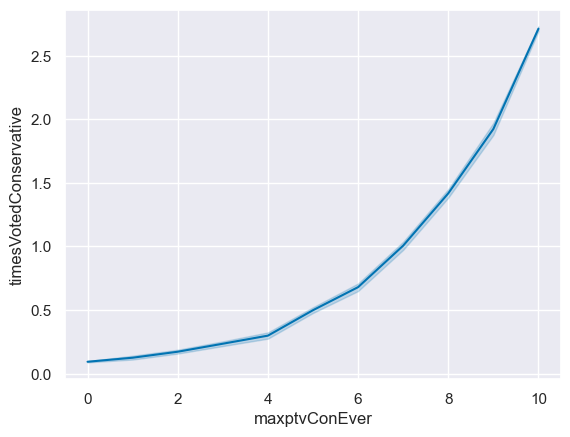

In [29]:
sns.lineplot(x=BES_Panel["maxptvConEver"],y=BES_Panel["timesVotedConservative"])

In [31]:
BES_Panel["maxptvConEver"].value_counts().sort_index()

maxptvConEver
0.0     30754
1.0      4127
2.0      4531
3.0      4351
4.0      3010
5.0      6084
6.0      4236
7.0      5609
8.0      6380
9.0      4270
10.0    28687
Name: count, dtype: int64

In [32]:
search(BES_Panel,"generalElectionVote")

generalElectionVoteW1              30546
generalElectionVoteW2              30882
generalElectionVoteW3              28561
generalElectionVoteW4              31547
generalElectionVoteUnsqueezeW4     20884
generalElectionVoteSqueezeW4        9399
generalElectionVoteW5              30508
generalElectionVotePostW5           3241
generalElectionVoteUnsqueezeW5     19487
generalElectionVoteSqueezeW5        6814
generalElectionVoteW6              27838
generalElectionVoteW7              30895
generalElectionVoteW8              33502
generalElectionVoteW9              30036
generalElectionVoteW10             30237
generalElectionVoteW11             30956
generalElectionVoteUnsqueezeW11    20488
generalElectionVoteSqueezeW11       9330
generalElectionVoteW12             34394
generalElectionVotePostW12          4335
generalElectionVoteUnsqueezeW12    21316
generalElectionVoteSqueezeW12       7389
generalElectionVoteW13             28296
generalElectionVoteW14             31063
generalElectionV

In [40]:
BES_Panel["generalElectionVoteW26"][BES_Panel["maxptvConEver"]>=6].value_counts(normalize=True)*100

generalElectionVoteW26
Conservative                                29.940541
Don't know                                  21.411674
Labour                                      16.801995
Brexit Party/Reform UK                      15.926092
Liberal Democrat                             5.913944
I would/did not vote                         5.229845
Green Party                                  2.378365
Other                                        1.675085
Scottish National Party (SNP)                0.485902
Plaid Cymru                                  0.236558
United Kingdom Independence Party (UKIP)     0.000000
British National Party (BNP)                 0.000000
Change UK- The Independent Group             0.000000
An independent candidate                     0.000000
Name: proportion, dtype: float64

In [46]:
(BES_Panel["p_past_vote_2019"][BES_Panel["maxptvConEver"]>=6].value_counts(normalize=True)*100)

p_past_vote_2019
Conservative                                69.557335
Labour                                      11.361614
Liberal Democrat                             9.947592
Brexit Party/Reform UK                       2.772010
Green Party                                  2.116088
Other                                        1.186592
Don't know                                   1.160223
Scottish National Party (SNP)                1.110782
An independent candidate                     0.398827
Plaid Cymru                                  0.326313
United Kingdom Independence Party (UKIP)     0.062626
Name: proportion, dtype: float64

In [42]:
BES_Panel["generalElectionVoteW26"][BES_Panel["timesVotedConservative"]>=1].value_counts(normalize=True)*100

generalElectionVoteW26
Conservative                                31.805198
Don't know                                  21.305650
Brexit Party/Reform UK                      17.236815
Labour                                      15.362642
Liberal Democrat                             5.511043
I would/did not vote                         4.340556
Green Party                                  2.118024
Other                                        1.811468
Scottish National Party (SNP)                0.306556
Plaid Cymru                                  0.202048
United Kingdom Independence Party (UKIP)     0.000000
British National Party (BNP)                 0.000000
Change UK- The Independent Group             0.000000
An independent candidate                     0.000000
Name: proportion, dtype: float64

In [44]:
BES_Panel["p_past_vote_2019"][BES_Panel["timesVotedConservative"]>=1].value_counts(normalize=True)*100

p_past_vote_2019
Conservative                                77.410468
Liberal Democrat                             8.611366
Labour                                       7.584260
Brexit Party/Reform UK                       1.914771
Green Party                                  1.649492
Other                                        0.942081
Don't know                                   0.700609
Scottish National Party (SNP)                0.595177
An independent candidate                     0.329898
Plaid Cymru                                  0.224467
United Kingdom Independence Party (UKIP)     0.037411
Name: proportion, dtype: float64

In [41]:
BES_Panel["generalElectionVoteW26"][BES_Panel["p_past_vote_2019"]=="Conservative"].value_counts(normalize=True)*100

generalElectionVoteW26
Conservative                                38.815789
Don't know                                  21.546053
Brexit Party/Reform UK                      20.481811
Labour                                       9.384675
I would/did not vote                         3.821594
Liberal Democrat                             2.912152
Other                                        1.693111
Green Party                                  1.160991
Scottish National Party (SNP)                0.096749
Plaid Cymru                                  0.087074
United Kingdom Independence Party (UKIP)     0.000000
British National Party (BNP)                 0.000000
Change UK- The Independent Group             0.000000
An independent candidate                     0.000000
Name: proportion, dtype: float64

In [ ]:
# add weights, restrict to England to make life easier?
# reassign DKs based on their past vote/like<party> and actual election %?



In [55]:
search(BES_Panel,"^weightW26|country")

abroadCountry_1W8               5258
abroadCountry_2W8               5258
motherCountryBornW8            24295
fatherCountryBornW8            24295
automationEffectsCountryW16     9330
environCountrysideW25           7636
countryW1                      30587
countryW2                      30221
countryW3                      28104
countryW4                      31552
countryW5                      30809
countryW6                      30131
countryW7                      30895
countryW8                      33502
countryW9                      30036
countryW10                     30214
countryW11                     30956
countryW12                     34394
countryW13                     31114
countryW14                     31063
countryW15                     30842
countryW16                     37959
countryW17                     34366
countryW18                     37825
countryW19                     32177
countryW20                     31468
countryW21                     30281
c

In [62]:
country = BES_Panel[search(BES_Panel,"^country").index].fillna(method='ffill',axis=1)["countryW25"]

In [68]:
mask = (BES_Panel["p_past_vote_2019"]=="Conservative")&(country=="England")

vi_replace_dict = {'I would/did not vote':"DNV", 'Conservative':"CON", 'Labour':"LAB", 'Liberal Democrat':"LD",
       'Scottish National Party (SNP)':np.nan, 'Plaid Cymru':np.nan, #england only!
       'United Kingdom Independence Party (UKIP)':np.nan, 'Green Party':"GRN",
       'British National Party (BNP)':np.nan, 'Other':"OTH",
       'Change UK- The Independent Group':np.nan, 'Brexit Party/Reform UK':"REF",
       'An independent candidate':"OTH", "Don't know":"DK"}

wvc = weighted_value_counts(BES_Panel["generalElectionVoteW26"][mask].astype('object').replace(vi_replace_dict),
                      BES_Panel["weightW26"][mask],normalize=True,perc=True)
wvc["raw_sample_size"] = wvc["raw_sample_size"].astype(int)
wvc


,weighted_sample_percentage,raw_sample_size
generalElectionVoteW26,,
GRN,1.48,117
OTH,1.72,148
LD,3.21,270
DNV,5.01,364
LAB,10.12,791
REF,20.03,1913
DK,22.03,1979
CON,35.09,3507


In [76]:
BES_Panel["p_past_vote_2019"].cat.categories

pv_2019_replace_dict = {'Conservative':"CON", 'Labour':"LAB", 'Liberal Democrat':"LD",
       'Scottish National Party (SNP)':np.nan, 'Plaid Cymru':np.nan,
       'United Kingdom Independence Party (UKIP)':"BXP&UKIP", 'Green Party':"GRN", 'Other':"OTH",
       'Brexit Party/Reform UK':"BXP&UKIP", 'An independent candidate':"OTH", "Don't know":np.nan}

mask = (BES_Panel["timesVotedConservative"]>=1)&(country=="England")

wvc = weighted_value_counts(BES_Panel["p_past_vote_2019"][mask].astype('object').replace(pv_2019_replace_dict),
                      BES_Panel["weightW26"][mask],normalize=True,perc=True)
wvc["raw_sample_size"] = wvc["raw_sample_size"].astype(int)
wvc

,weighted_sample_percentage,raw_sample_size
p_past_vote_2019,,
OTH,0.94,182
GRN,1.26,208
BXP&UKIP,1.80,240
LAB,6.48,799
LD,7.53,1060
CON,72.91,9169


In [72]:
BES_Panel["p_past_vote_2019"].value_counts()

p_past_vote_2019
Conservative                                22761
Labour                                      17991
Liberal Democrat                             6910
Scottish National Party (SNP)                2633
Green Party                                  1884
Brexit Party/Reform UK                       1228
Don't know                                    831
Other                                         765
Plaid Cymru                                   392
An independent candidate                      229
United Kingdom Independence Party (UKIP)       32
Name: count, dtype: int64

In [91]:
## England Vote 2024

# Turnout 60%
# LAB 34.4
# CON 25.9
# LD 13.2
# REF 15.3
# GRN 7.3
## 96.1
# OTH 3.9

# Speaker .1, Workers PArty .9, SDP .1, Independent 2.1

# Galloway's Workers Party not totally trivial


actual_vote_dist = {"LAB":34.4,"CON":25.9,"LD":13.2,"REF":15.3,"GRN":7.3,"OTH":3.9}
# sum(list(actual_vote_dist.values()))
pd.Series(actual_vote_dist)

LAB    34.4
CON    25.9
LD     13.2
REF    15.3
GRN     7.3
OTH     3.9
dtype: float64

In [79]:
mask = (country=="England")

wvc = weighted_value_counts(BES_Panel["generalElectionVoteW26"][mask].astype('object').replace(vi_replace_dict),
                      BES_Panel["weightW26"][mask],normalize=True,perc=True)
wvc["raw_sample_size"] = wvc["raw_sample_size"].astype(int)
wvc

,weighted_sample_percentage,raw_sample_size
generalElectionVoteW26,,
OTH,1.90,430
GRN,5.11,1134
LD,6.50,1657
DNV,10.12,1520
REF,10.32,2602
CON,15.48,4133
DK,17.49,3985
LAB,30.65,7109


In [92]:
approx_vote_dist = wvc["weighted_sample_percentage"].drop("DNV")
approx_vote_dist = approx_vote_dist/(approx_vote_dist.sum()/100)
print(approx_vote_dist)


approx_vote_dist = approx_vote_dist.drop("DK")
approx_vote_dist = approx_vote_dist/(approx_vote_dist.sum()/100)
print(approx_vote_dist)

generalElectionVoteW26
OTH     2.172670
GRN     5.843339
LD      7.432819
REF    11.801029
CON    17.701544
DK     20.000000
LAB    35.048599
Name: weighted_sample_percentage, dtype: float64
generalElectionVoteW26
OTH     2.715838
GRN     7.304174
LD      9.291023
REF    14.751286
CON    22.126930
LAB    43.810749
Name: weighted_sample_percentage, dtype: float64


In [94]:
## don't even try to track non-voting!

def evaluate_vote_dist(approx_vote_dist,actual_vote_dist):
    
    return (pd.Series(actual_vote_dist) - pd.Series(approx_vote_dist)).apply(lambda x: x*x).sum()
    
evaluate_vote_dist(approx_vote_dist,actual_vote_dist)    

119.78169866567542

In [96]:
search(BES_Panel,"likeCon")

likeConW1           15335
likeConW2           15369
likeConW3           13854
likeConW4           15695
likeConW5           15443
likeConW6           15008
likeConW7           30895
likeConW8           33502
likeConW9           30036
likeConW10          30237
likeConW11          30956
likeConW12          34394
likeConW13          31135
likeConW14          31063
likeConW15          30842
likeConW16          37959
likeConW17          34366
likeConW18          37825
likeConW19          32177
likeConW20          31468
likeConW21          30281
likeConW22          28113
likeConW23          30949
likeConW24          15405
likeConW25          30407
likeConLeaderW26    27540
likeConW26          27540
dtype: int64

In [99]:
mask = (country=="England") & (BES_Panel["generalElectionVoteW26"]=="Don't know")

BES_Panel[search(BES_Panel,"like.*W26").index][mask].columns

Index(['likeConLeaderW26', 'likeLabLeaderW26', 'likeLDLeaderW26',
       'likePCLeaderW26', 'likeBrexitLeaderW26', 'likeSNPLeaderW26',
       'likeConW26', 'likeLabW26', 'likeLDW26', 'likeSNPW26', 'likePCW26',
       'likeBrexitPartyW26'],
      dtype='object')

In [103]:
likeCols = [ 'likeConW26', 'likeLabW26', 'likeLDW26',  'likeBrexitPartyW26' ]
BES_Panel[likeCols][mask].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)).idxmax(axis=1).value_counts()


likeConW26            2019
likeLabW26             764
likeLDW26              503
likeBrexitPartyW26     428
Name: count, dtype: int64

In [110]:
BES_Panel["generalElectionVoteW26_reassigned"] = BES_Panel["generalElectionVoteW26"].copy().astype('object')
DK_reassignment = BES_Panel[likeCols][mask].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)).idxmax(axis=1)
DK_replace_dict = {"likeConW26":"CON","likeLabW26":"LAB","likeLDW26":"LD","likeBrexitPartyW26":"REF"}
DK_reassignment = DK_reassignment.replace(DK_replace_dict).astype('object')


BES_Panel.loc[mask,"generalElectionVoteW26_reassigned"] = DK_reassignment.astype('object')

In [121]:
mask = (country=="England")

wvc = weighted_value_counts(BES_Panel["generalElectionVoteW26_reassigned"][mask].astype('object').replace(vi_replace_dict),
                      BES_Panel["weightW26"][mask],normalize=True,perc=True)
wvc["raw_sample_size"] = wvc["raw_sample_size"].astype(int)
wvc["weighted_sample_percentage"] = wvc["weighted_sample_percentage"]*100/(wvc["weighted_sample_percentage"].sum())
wvc

,weighted_sample_percentage,raw_sample_size
generalElectionVoteW26_reassigned,,
OTH,2.216519,430
GRN,5.961269,1134
LD,10.055996,2160
REF,14.104060,3030
CON,27.869809,6152
LAB,39.792347,7873


In [160]:
mask = (BES_Panel["p_past_vote_2019"]=="Conservative")&(country=="England")

vi_replace_dict = {'I would/did not vote':np.nan,
                   'Conservative':"CON", 'Labour':"LAB", 'Liberal Democrat':"LD",
       'Scottish National Party (SNP)':np.nan, 'Plaid Cymru':np.nan, #england only!
       'United Kingdom Independence Party (UKIP)':np.nan, 'Green Party':"GRN",
       'British National Party (BNP)':np.nan, 'Other':"OTH",
       'Change UK- The Independent Group':np.nan, 'Brexit Party/Reform UK':"REF",
       'An independent candidate':"OTH", "Don't know":"DK",
        }

wvc = weighted_value_counts(BES_Panel["generalElectionVoteW26_reassigned"][mask].astype('object').replace(vi_replace_dict),
                      BES_Panel["weightW26"][mask],normalize=True,perc=True)
wvc["raw_sample_size"] = wvc["raw_sample_size"].astype(int)
wvc["weighted_sample_percentage"] = wvc["weighted_sample_percentage"]*100/(wvc["weighted_sample_percentage"].sum())
wvc


,weighted_sample_percentage,raw_sample_size
generalElectionVoteW26_reassigned,,
GRN,1.597755,117
OTH,1.856850,148
LD,4.879629,394
LAB,12.836014,939
REF,25.078268,2205
CON,53.751484,4859


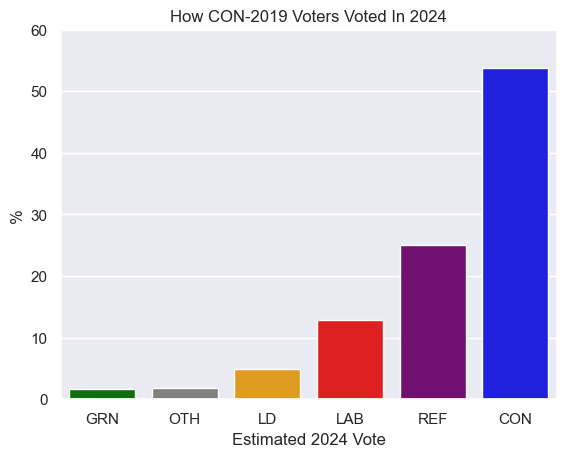

In [165]:
col_palette = {"OTH":"grey","CON":"blue","REF":"purple","LAB":"red","LD":"orange","GRN":"green",
              "LAB&LD&GRN":"red"}
hatch_palette = {"OTH":"","CON":"","REF":"","LAB":"//","LD":"","GRN":"",}

#               "LAB&LD&GRN":"//"}

breakdown = wvc["weighted_sample_percentage"]



bar =sns.barplot(breakdown,palette = col_palette);
plt.ylim([0,60]);
plt.ylabel("%");
plt.xlabel("Estimated 2024 Vote");
plt.title("How CON-2019 Voters Voted In 2024");


# hatches = ["", "", "\\","",]
# for i,thisbar in enumerate(bar.patches):
#     # Set a different hatch for each bar
#     thisbar.set_hatch(hatches[i])

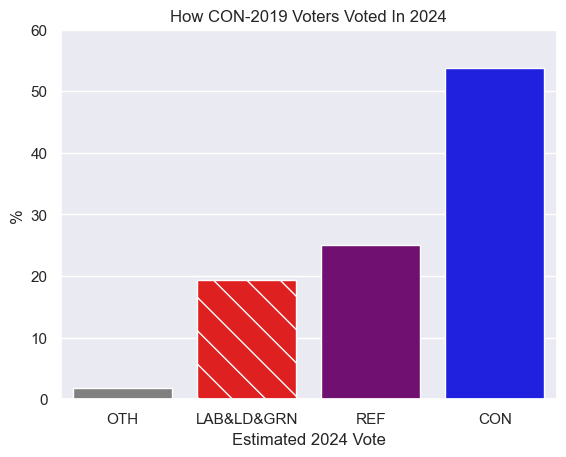

In [167]:
mask = (BES_Panel["p_past_vote_2019"]=="Conservative")&(country=="England")

vi_replace_dict = {'I would/did not vote':np.nan,
                   'Conservative':"CON", 'Labour':"LAB", 'Liberal Democrat':"LD",
       'Scottish National Party (SNP)':np.nan, 'Plaid Cymru':np.nan, #england only!
       'United Kingdom Independence Party (UKIP)':np.nan, 'Green Party':"GRN",
       'British National Party (BNP)':np.nan, 'Other':"OTH",
       'Change UK- The Independent Group':np.nan, 'Brexit Party/Reform UK':"REF",
       'An independent candidate':"OTH", "Don't know":"DK",
        }

wvc = weighted_value_counts(BES_Panel["generalElectionVoteW26_reassigned"][mask].astype('object').replace(vi_replace_dict_merged),
                      BES_Panel["weightW26"][mask],normalize=True,perc=True)
wvc["raw_sample_size"] = wvc["raw_sample_size"].astype(int)
wvc["weighted_sample_percentage"] = wvc["weighted_sample_percentage"]*100/(wvc["weighted_sample_percentage"].sum())
wvc

breakdown = wvc["weighted_sample_percentage"]

bar =sns.barplot(breakdown,palette = col_palette);
plt.ylim([0,60]);
plt.ylabel("%");
plt.xlabel("Estimated 2024 Vote");
plt.title("How CON-2019 Voters Voted In 2024");

hatches = ["", "\\","","",]
for i,thisbar in enumerate(bar.patches):
    # Set a different hatch for each bar
    thisbar.set_hatch(hatches[i])

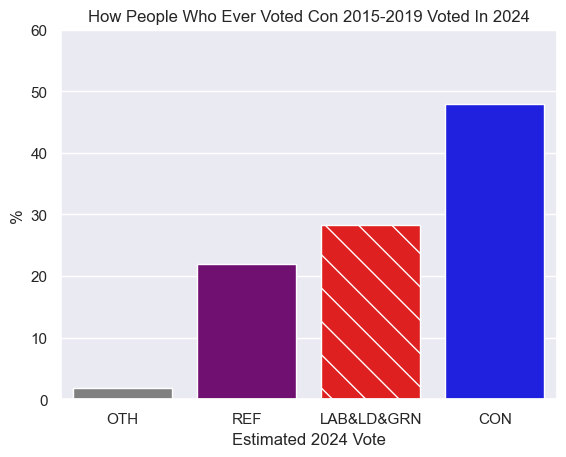

In [169]:
mask = (BES_Panel["timesVotedConservativeRecently"]>=1)&(country=="England")

vi_replace_dict = {'I would/did not vote':np.nan,
                   'Conservative':"CON", 'Labour':"LAB", 'Liberal Democrat':"LD",
       'Scottish National Party (SNP)':np.nan, 'Plaid Cymru':np.nan, #england only!
       'United Kingdom Independence Party (UKIP)':np.nan, 'Green Party':"GRN",
       'British National Party (BNP)':np.nan, 'Other':"OTH",
       'Change UK- The Independent Group':np.nan, 'Brexit Party/Reform UK':"REF",
       'An independent candidate':"OTH", "Don't know":"DK",
        }

wvc = weighted_value_counts(BES_Panel["generalElectionVoteW26_reassigned"][mask].astype('object').replace(vi_replace_dict_merged),
                      BES_Panel["weightW26"][mask],normalize=True,perc=True)
wvc["raw_sample_size"] = wvc["raw_sample_size"].astype(int)
wvc["weighted_sample_percentage"] = wvc["weighted_sample_percentage"]*100/(wvc["weighted_sample_percentage"].sum())
wvc

breakdown = wvc["weighted_sample_percentage"]

bar =sns.barplot(breakdown,palette = col_palette);
plt.ylim([0,60]);
plt.ylabel("%");
plt.xlabel("Estimated 2024 Vote");
plt.title("How People Who Ever Voted Con 2015-2019 Voted In 2024");

hatches = ["", "","\\","",]
for i,thisbar in enumerate(bar.patches):
    # Set a different hatch for each bar
    thisbar.set_hatch(hatches[i])

In [125]:
mask = (BES_Panel["timesVotedConservative"]>=1)&(country=="England")

vi_replace_dict = {'I would/did not vote':np.nan,
                   'Conservative':"CON", 'Labour':"LAB", 'Liberal Democrat':"LD",
       'Scottish National Party (SNP)':np.nan, 'Plaid Cymru':np.nan, #england only!
       'United Kingdom Independence Party (UKIP)':np.nan, 'Green Party':"GRN",
       'British National Party (BNP)':np.nan, 'Other':"OTH",
       'Change UK- The Independent Group':np.nan, 'Brexit Party/Reform UK':"REF",
       'An independent candidate':"OTH", "Don't know":"DK",
        }

wvc = weighted_value_counts(BES_Panel["generalElectionVoteW26_reassigned"][mask].astype('object').replace(vi_replace_dict),
                      BES_Panel["weightW26"][mask],normalize=True,perc=True)
wvc["raw_sample_size"] = wvc["raw_sample_size"].astype(int)
wvc["weighted_sample_percentage"] = wvc["weighted_sample_percentage"]*100/(wvc["weighted_sample_percentage"].sum())
wvc


,weighted_sample_percentage,raw_sample_size
generalElectionVoteW26_reassigned,,
OTH,1.896098,222
GRN,2.619465,288
LD,8.143358,977
LAB,20.078913,2142
REF,21.383165,2565
CON,45.879000,5673


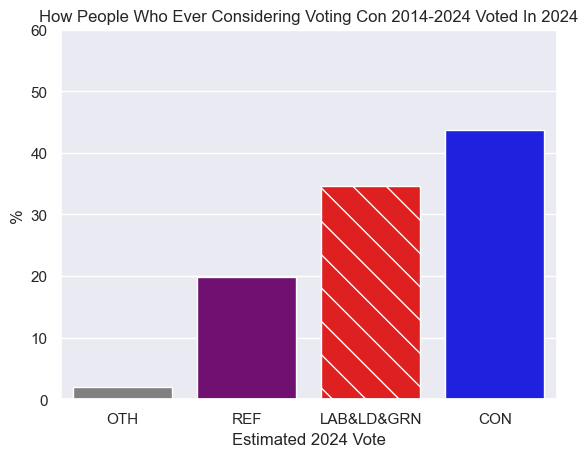

In [171]:
mask = (BES_Panel["maxptvConEver"]>=6)&(country=="England")

vi_replace_dict = {'I would/did not vote':np.nan,
                   'Conservative':"CON", 'Labour':"LAB", 'Liberal Democrat':"LD",
       'Scottish National Party (SNP)':np.nan, 'Plaid Cymru':np.nan, #england only!
       'United Kingdom Independence Party (UKIP)':np.nan, 'Green Party':"GRN",
       'British National Party (BNP)':np.nan, 'Other':"OTH",
       'Change UK- The Independent Group':np.nan, 'Brexit Party/Reform UK':"REF",
       'An independent candidate':"OTH", "Don't know":"DK",
        }

wvc = weighted_value_counts(BES_Panel["generalElectionVoteW26_reassigned"][mask].astype('object').replace(vi_replace_dict_merged),
                      BES_Panel["weightW26"][mask],normalize=True,perc=True)
wvc["raw_sample_size"] = wvc["raw_sample_size"].astype(int)
wvc["weighted_sample_percentage"] = wvc["weighted_sample_percentage"]*100/(wvc["weighted_sample_percentage"].sum())
wvc

breakdown = wvc["weighted_sample_percentage"]

bar =sns.barplot(breakdown,palette = col_palette);
plt.ylim([0,60]);
plt.ylabel("%");
plt.xlabel("Estimated 2024 Vote");
plt.title("How People Who Ever Considering Voting Con 2014-2024 Voted In 2024");

hatches = ["", "","\\","",]
for i,thisbar in enumerate(bar.patches):
    # Set a different hatch for each bar
    thisbar.set_hatch(hatches[i])

In [158]:
vi_replace_dict_merged = {'I would/did not vote':np.nan,
                   'Conservative':"CON", 'Labour':"LAB&LD&GRN", 'Liberal Democrat':"LAB&LD&GRN", 'Green Party':"LAB&LD&GRN",
                          "LAB":"LAB&LD&GRN",'LD':"LAB&LD&GRN",'GRN':"LAB&LD&GRN",
       'Scottish National Party (SNP)':np.nan, 'Plaid Cymru':np.nan, #england only!
       'United Kingdom Independence Party (UKIP)':np.nan,
       'British National Party (BNP)':np.nan, 'Other':"OTH",
       'Change UK- The Independent Group':np.nan, 'Brexit Party/Reform UK':"REF",
       'An independent candidate':"OTH", "Don't know":"DK",
        }

wvc = weighted_value_counts(BES_Panel["generalElectionVoteW26_reassigned"][mask].astype('object').replace(vi_replace_dict_merged),
                      BES_Panel["weightW26"][mask],normalize=True,perc=True)
wvc["raw_sample_size"] = wvc["raw_sample_size"].astype(int)
wvc["weighted_sample_percentage"] = wvc["weighted_sample_percentage"]*100/(wvc["weighted_sample_percentage"].sum())
wvc

,weighted_sample_percentage,raw_sample_size
generalElectionVoteW26_reassigned,,
OTH,1.934541,223
REF,19.772804,2586
LAB&LD&GRN,34.630525,4022
CON,43.662130,5853


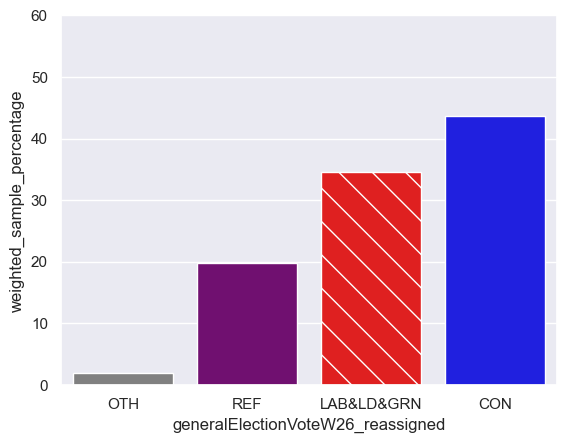

In [159]:
col_palette = {"OTH":"grey","CON":"blue","REF":"purple","LAB":"red","LD":"orange","GRN":"green",
              "LAB&LD&GRN":"red"}
hatch_palette = {"OTH":"","CON":"","REF":"","LAB":"//","LD":"","GRN":"",}

#               "LAB&LD&GRN":"//"}

breakdown = wvc["weighted_sample_percentage"]



bar =sns.barplot(breakdown,palette = col_palette, hatch=hatch_palette);
plt.ylim([0,60]);

hatches = ["", "", "\\","",]
for i,thisbar in enumerate(bar.patches):
    # Set a different hatch for each bar
    thisbar.set_hatch(hatches[i])

In [145]:
hatch_palette.items()

dict_items([('OTH', ''), ('CON', ''), ('REF', ''), ('LAB', '//'), ('LD', ''), ('GRN', '')])

In [146]:
ax.artists

<Axes.ArtistList of 0 artists>